In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
logs = pickle.load(open("log.pkl", "rb"))

In [3]:
y = []
yerr = []
x = []
for log in logs:
    y.append(np.mean(log['return_per_episode']))
    yerr.append(np.std(log['return_per_episode']))
    x.append(log['difficulty'])

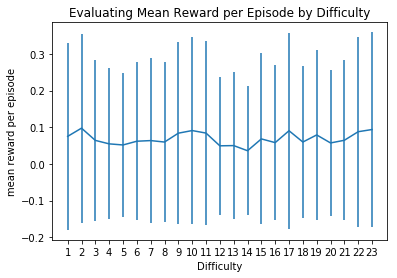

In [4]:
plt.errorbar(y=y, x=x, yerr=yerr)
plt.xticks(x)
plt.title("Evaluating Mean Reward per Episode by Difficulty")
plt.xlabel("Difficulty")
plt.ylabel("mean reward per episode")
plt.savefig("perf_hist.png")


In [5]:
y = []
yerr = []
x = []
for log in logs:
    y.append(np.sum(np.array(log['return_per_episode']) != 0) / len(log['return_per_episode']))
    x.append(log['difficulty'])

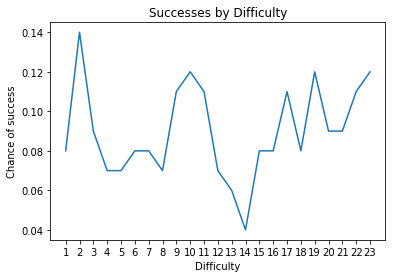

In [6]:
plt.errorbar(y=y, x=x)
plt.xticks(x)
plt.title("Successes by Difficulty")
plt.xlabel("Difficulty")
plt.ylabel("Chance of success")
plt.savefig("successes_by_difficulty.png")


In [11]:
m = []
for log in logs:
    m.append(log['return_per_episode'])
    

0.0687495652173913

In [7]:
y = []
yerr = []
x = []
for log in logs:
    return_per_episode = np.array([x for x in np.array(log['return_per_episode']) if x != 0])
    y.append(np.mean(return_per_episode))
    yerr.append(np.std(return_per_episode))
    x.append(log['difficulty'])

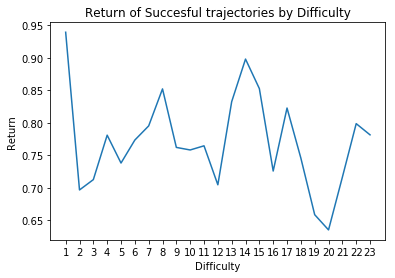

In [8]:
plt.errorbar(y=y, x=x)
plt.xticks(x)
plt.title("Return of Succesful trajectories by Difficulty")
plt.xlabel("Difficulty")
plt.ylabel("Return")
plt.savefig("return_of_succesful_traj_by_difficulty.png")


In [9]:
y = []
x = []
yerr = []
for log in logs:
    y.append(np.mean(log['target_path_length']))
    yerr.append(np.std(log['target_path_length']))
    x.append(log['difficulty'])

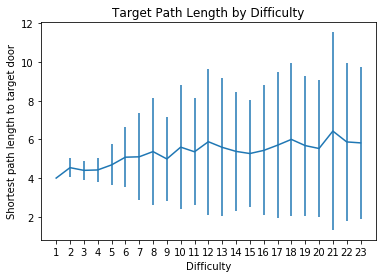

In [10]:
plt.errorbar(y=y, x=x, yerr=yerr)
plt.xticks(x)
plt.title("Target Path Length by Difficulty")
plt.xlabel("Difficulty")
plt.ylabel("Shortest path length to target door")
plt.savefig("target_path_length.png")


In [14]:
import random
import networkx as nx
import time
from gym_minigrid.minigrid import *
from gym_minigrid.register import register


In [19]:
difficulty = 10
difficulty_bias = 2  # at 1.0, there is no bias
difficulties = np.arange(1, difficulty+1)
total = np.sum(difficulties)
probs = difficulties / (difficulty_bias * total)
probs[-1] = probs[-1] + (1.0/difficulty_bias)
actual_difficulty = np.random.choice(difficulties, p=probs)
difficulties


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [22]:
probs

array([0.00909091, 0.01818182, 0.02727273, 0.03636364, 0.04545455,
       0.05454545, 0.06363636, 0.07272727, 0.08181818, 0.59090909])